In [1]:
# standard ds imports
import numpy as np
import pandas as pd

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# for statistical analysis
import scipy.stats as stats

# for wrangling
import wrangle

# for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer

# for modeling and evaluation
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

#### 1. Load your zillow dataset.

In [2]:
zil = wrangle.wrangle_zillow()

In [3]:
zil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1855285 entries, 6 to 2152863
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   beds       float64
 1   baths      float64
 2   sqft       float64
 3   tax_value  float64
 4   built      float64
 5   taxes      float64
 6   city       float64
 7   location   object 
dtypes: float64(7), object(1)
memory usage: 127.4+ MB


In [4]:
zil.head()

,beds,baths,sqft,tax_value,built,taxes,city,location
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0,Los Angeles
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0,Los Angeles
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0,Los Angeles
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0,Los Angeles
20,3.0,2.0,1222.0,290492.0,1951.0,3870.25,6037.0,Los Angeles


In [5]:
train, val, test = wrangle.split_data(zil)

In [6]:
train, val, test = wrangle.impute_mode(train, val, test, 'built')

In [7]:
train = wrangle.feature_engineer(train)
val = wrangle.feature_engineer(val)
test = wrangle.feature_engineer(test)

In [8]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,city,location,decade,location_percentile
759032,3.0,2.0,1751.0,146024.0,1938.0,1888.49,6037.0,Los Angeles,1930,1
1533668,2.0,1.0,1224.0,310023.0,1942.0,3820.29,6037.0,Los Angeles,1940,3
1070151,5.0,4.0,2501.0,524050.0,1959.0,5767.35,6037.0,Los Angeles,1950,4
59636,2.0,2.0,1128.0,162970.0,1981.0,2509.52,6037.0,Los Angeles,1980,2
17435,4.0,4.0,3256.0,667084.0,1987.0,8269.47,6037.0,Los Angeles,1980,4


In [9]:
X_train = train.sqft
y_train = train.tax_value
X_val = val.sqft
y_val = val.tax_value

#### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

- Here is some sample code to get you started:
- from sklearn.linear_model import LinearRegression
- assuming X and y are already defined
- model = LinearRegression().fit(X, y)
- predictions = model.predict(X)
- Modify and add to the code above as necessary for it to work with the zillow dataset.

In [10]:
train.head()

,beds,baths,sqft,tax_value,built,taxes,city,location,decade,location_percentile
759032,3.0,2.0,1751.0,146024.0,1938.0,1888.49,6037.0,Los Angeles,1930,1
1533668,2.0,1.0,1224.0,310023.0,1942.0,3820.29,6037.0,Los Angeles,1940,3
1070151,5.0,4.0,2501.0,524050.0,1959.0,5767.35,6037.0,Los Angeles,1950,4
59636,2.0,2.0,1128.0,162970.0,1981.0,2509.52,6037.0,Los Angeles,1980,2
17435,4.0,4.0,3256.0,667084.0,1987.0,8269.47,6037.0,Los Angeles,1980,4


In [11]:
df = pd.DataFrame({'X_train':X_train, 'y_train':y_train})
df.head()

,X_train,y_train
759032,1751.0,146024.0
1533668,1224.0,310023.0
1070151,2501.0,524050.0
59636,1128.0,162970.0
17435,3256.0,667084.0


In [12]:
mms = MinMaxScaler()
df['X_train'] = mms.fit_transform(df[['X_train']])

In [13]:
df.head()

,X_train,y_train
759032,0.513347,146024.0
1533668,0.358756,310023.0
1070151,0.733353,524050.0
59636,0.330595,162970.0
17435,0.954825,667084.0


In [14]:
baseline = df.y_train.mean()
df['baseline'] = baseline

In [15]:
lm = LinearRegression()
lm.fit(df[['X_train']], df[['y_train']])
df['yhat'] = lm.predict(df[['X_train']])

In [16]:
df.head()

,X_train,y_train,baseline,yhat
759032,0.513347,146024.0,327901.278059,342412.801210
1533668,0.358756,310023.0,327901.278059,263744.391693
1070151,0.733353,524050.0,327901.278059,454369.740751
59636,0.330595,162970.0,327901.278059,249413.903432
17435,0.954825,667084.0,327901.278059,567073.059888


#### 3. Plot the residuals for the linear regression model that you made.

In [17]:
df['baseline_residual'] = df.y_train - df.baseline
df['residual'] = df.y_train-df.yhat

In [18]:
df.head()

,X_train,y_train,baseline,yhat,baseline_residual,residual
759032,0.513347,146024.0,327901.278059,342412.801210,-181877.278059,-196388.801210
1533668,0.358756,310023.0,327901.278059,263744.391693,-17878.278059,46278.608307
1070151,0.733353,524050.0,327901.278059,454369.740751,196148.721941,69680.259249
59636,0.330595,162970.0,327901.278059,249413.903432,-164931.278059,-86443.903432
17435,0.954825,667084.0,327901.278059,567073.059888,339182.721941,100010.940112


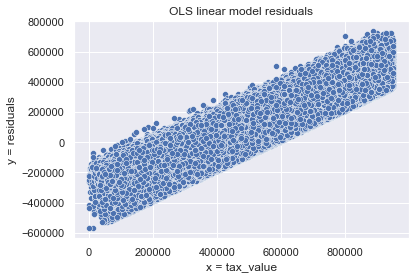

In [19]:
sns.scatterplot(data=df, x=df.y_train, y=df.residual)
plt.xlabel('x = tax_value')
plt.ylabel('y = residuals')
plt.title('OLS linear model residuals')
plt.show()

#### 4. Calculate the below for the model
- sum of squared errors
- mean squared error
- root mean squared error
- explained sum of squares
- total sum of squares

In [20]:
# did both together below

#### 5. Calculate the below for the baseline model
- sum of squared errors
- mean squared error
- root mean squared error

In [21]:
df.head()

,X_train,y_train,baseline,yhat,baseline_residual,residual
759032,0.513347,146024.0,327901.278059,342412.801210,-181877.278059,-196388.801210
1533668,0.358756,310023.0,327901.278059,263744.391693,-17878.278059,46278.608307
1070151,0.733353,524050.0,327901.278059,454369.740751,196148.721941,69680.259249
59636,0.330595,162970.0,327901.278059,249413.903432,-164931.278059,-86443.903432
17435,0.954825,667084.0,327901.278059,567073.059888,339182.721941,100010.940112


In [22]:
MSE_baseline = mean_squared_error(df.y_train, df.baseline)
MSE = mean_squared_error(df.y_train, df.yhat)
MSE_baseline, MSE

(39597017485.41761, 32497233201.989403)

In [23]:
SSE_baseline = MSE_baseline*len(df)
SSE = MSE*len(df)
SSE_baseline, SSE

(4.407825155125981e+16, 3.617497758069174e+16)

In [24]:
RMSE_baseline = mean_squared_error(df.y_train, df.baseline, squared=False)
RMSE = mean_squared_error(df.y_train, df.yhat, squared=False)
RMSE_baseline, RMSE

(198989.99343036726, 180269.88989287536)

In [25]:
EES = ((df.y_train.mean() - df.yhat)**2).sum()
EES

7903273970570425.0

In [26]:
TSS = SSE_baseline
TSS

4.407825155125981e+16

#### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [27]:
if SSE < SSE_baseline:
    print(f'The model performs better than the baseline.')
else:
    print('The baseline performs better than the model.')

The model performs better than the baseline.


#### 7. What is the amount of variance explained in your model?

In [28]:
r2_baseline = r2_score(df.y_train, df.baseline)
r2 = r2_score(df.y_train, df.yhat)
r2_baseline, r2

(0.0, 0.17930098614227308)

#### 8. Is your model better than the baseline model?

In [29]:
# BARELY

#### 9. Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [30]:
import evaluate

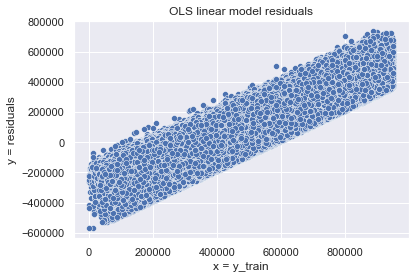

In [31]:
evaluate.plot_residuals(df.y_train, df.yhat)

In [32]:
MSE, SSE, RMSE, TSS, EES = evaluate.regression_errors(df.y_train, df.yhat)
MSE, SSE, RMSE, TSS, EES 

(32497233201.989403,
 3.617497758069174e+16,
 180269.88989287536,
 4.407825155125981e+16,
 7903273970568064.0)

In [33]:
MSE, SSE, RMSE = evaluate.baseline_mean_errors(df.y_train)
MSE, SSE, RMSE

(39597017485.41761, 4.407825155125981e+16, 198989.99343036726)

In [34]:
evaluate.better_than_baseline(df.y_train, df.yhat)

The model SSE performs better than the baseline.
            Baseline SSE: 4.407825155125981e+16
            Model SSE: 3.617497758069174e+16

The model RMSE performs better than the baseline.
            Baseline RMSE: 198989.99343036726
            Model RMSE: 180269.88989287536

The model R2 performs better than the baseline.
            Baseline R2: 0.0
            Model R2: 0.17930098614227308


In [33]:
train.columns

Index(['beds', 'baths', 'sqft', 'tax_value', 'built', 'taxes', 'city',
       'location'],
      dtype='object')

In [45]:
# Try scaling X_train:
X_train = train[['sqft', 'taxes', 'decade', 'location_percentile', 'city']]
X_val = val[['sqft', 'taxes', 'decade', 'location_percentile', 'city']]
y_val = val.tax_value

In [36]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [37]:
df.head()

,X_train,y_train,baseline,yhat,baseline_residual,residual
759032,0.513347,146024.0,327901.278059,342412.801210,-181877.278059,-196388.801210
1533668,0.358756,310023.0,327901.278059,263744.391693,-17878.278059,46278.608307
1070151,0.733353,524050.0,327901.278059,454369.740751,196148.721941,69680.259249
59636,0.330595,162970.0,327901.278059,249413.903432,-164931.278059,-86443.903432
17435,0.954825,667084.0,327901.278059,567073.059888,339182.721941,100010.940112


In [39]:
lm2 = LinearRegression()
lm.fit(X_train_scaled, y_train)
df['yhat_scaled'] = lm.predict(X_train_scaled)

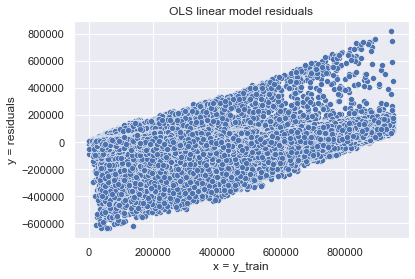

In [40]:
evaluate.plot_residuals(df.y_train, df.yhat_scaled)

In [43]:
yhat_val_scaled = lm.predict(X_val_scaled)

In [47]:
evaluate.better_than_baseline(y_train, df.yhat_scaled)

The model SSE performs better than the baseline.
            Baseline SSE: 4.407825155125981e+16
            Model SSE: 2012754715388001.8

The model RMSE performs better than the baseline.
            Baseline RMSE: 198989.99343036726
            Model RMSE: 42522.07846416965

The model R2 performs better than the baseline.
            Baseline R2: 0.0
            Model R2: 0.9543367841383791


In [46]:
evaluate.better_than_baseline(y_val, yhat_val_scaled)

The model SSE performs better than the baseline.
            Baseline SSE: 1.4642571794678256e+16
            Model SSE: 681510386524704.4

The model RMSE performs better than the baseline.
            Baseline RMSE: 198649.90722683715
            Model RMSE: 42856.42350309032

The model R2 performs better than the baseline.
            Baseline R2: 0.0
            Model R2: 0.9534569202677637
